<div style="font-family:'Poppins',sans-serif; background-color:#121212; color:#FFFFFF; border-radius:18px; padding:28px; max-width:900px; margin:auto; box-shadow:0 0 25px rgba(0,0,0,0.6); line-height:1.8;">

  <h2 style="color:#1DB954; text-align:center; font-size:26px; margin-bottom:15px;">❤️ 3️⃣ Health & Lifestyle Recommendation System</h2>

  <h3 style="color:#FFD60A; font-size:20px;">🎯 Goal</h3>
  <p>Recommend overall fitness and health adjustments (<strong>exercise + nutrition + habits</strong>).</p>

  <h3 style="color:#FFD60A; font-size:20px;">🔹 Input Features</h3>
  <ul style="list-style:none; padding-left:10px;">
    <li>🧍 <strong>Age, Gender, BMI, Fat_Percentage</strong></li>
    <li>🏋️ <strong>Workout_Frequency, Physical exercise</strong></li>
    <li>💧 <strong>Water_Intake (liters)</strong></li>
    <li>🍽️ <strong>Daily meals frequency</strong></li>
  </ul>

  <h3 style="color:#FFD60A; font-size:20px;">🔹 Output</h3>
  <p>Personalized suggestions like:</p>
  <ul style="list-style:none; padding-left:10px;">
    <li>💡 “Increase cardio sessions to 3/week”</li>
    <li>💧 “Drink at least 2.5L water per day”</li>
    <li>🍳 “Add protein-rich breakfast options”</li>
    <li>📊 “Your lifestyle score = 8/10”</li>
  </ul>

  <h3 style="color:#FFD60A; font-size:20px;">🔹 Techniques</h3>
  <table style="width:100%; border-collapse:collapse; text-align:left; background-color:#1E1E1E; border-radius:10px; overflow:hidden; margin-top:10px;">
    <tr style="background-color:#1DB95433;">
      <th style="padding:10px; color:#1DB954;">Method</th>
      <th style="padding:10px; color:#1DB954;">Description</th>
    </tr>
    <tr>
      <td style="padding:10px;">Rule-Based</td>
      <td style="padding:10px;">Use thresholds (BMI, calories, etc.) to generate suggestions.</td>
    </tr>
    <tr>
      <td style="padding:10px;">Machine Learning</td>
      <td style="padding:10px;">Train model to predict health level  and give tips for improvement.</td>
    </tr>
    <tr>
      <td style="padding:10px;">Recommendation Hybrid</td>
      <td style="padding:10px;">Combine habits + meals + workouts based on user health pattern.</td>
    </tr>
  </table>

  <h3 style="color:#FFD60A; font-size:20px;">🔹 Example</h3>
  <p>If user has high BMI, low activity, and low water intake →</p>
  <div style="background-color:#1E1E1E; border-left:5px solid #1DB954; padding:10px 15px; border-radius:8px;">
    💡 Suggest more daily movement, water intake, and lower-calorie meals.
  </div>

  <h3 style="color:#FFD60A; font-size:20px;">🚀 Implementation Roadmap</h3>
  <table style="width:100%; border-collapse:collapse; text-align:left; background-color:#1E1E1E; border-radius:10px; overflow:hidden;">
    <tr style="background-color:#1DB95433;">
      <th style="padding:10px; color:#1DB954;">Phase</th>
      <th style="padding:10px; color:#1DB954;">Task</th>
      <th style="padding:10px; color:#1DB954;">Tools</th>
    </tr>
    <tr>
      <td style="padding:10px;">Data Prep</td>
      <td style="padding:10px;">Clean, encode categorical columns</td>
      <td style="padding:10px;">pandas, sklearn</td>
    </tr>
    <tr>
      <td style="padding:10px;">Modeling</td>
      <td style="padding:10px;">Create 3 recommenders</td>
      <td style="padding:10px;">sklearn, scipy</td>
    </tr>
    <tr>
      <td style="padding:10px;">Evaluation</td>
      <td style="padding:10px;">Check relevance & personalization</td>
      <td style="padding:10px;">cosine similarity, precision@k</td>
    </tr>
    <tr>
      <td style="padding:10px;">Deployment</td>
      <td style="padding:10px;">Flask or Streamlit app</td>
      <td style="padding:10px;">Flask / Streamlit + SQLite/PostgreSQL</td>
    </tr>
  </table>

</div>


## ⚙️ Import & Prepare Data

In [1]:
# system Handling
import os
import warnings
import joblib # => model deployment

# Data Handling & Vasualization
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
# Machine Learning Library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/life-style-data/Final_data.csv
/kaggle/input/life-style-data/expanded_fitness_data.csv


In [2]:
df=pd.read_csv('/kaggle/input/life-style-data/Final_data.csv') 
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')

In [3]:
df.head(2)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High


In [4]:
# Select only the relevant columns
features = [
    'Age', 'Gender', 'BMI', 'Fat_Percentage',
    'Workout_Frequency (days/week)', 'Physical exercise',
    'Water_Intake (liters)', 'Daily meals frequency'
]


## 🧩 Define Lifestyle Score (0–10)

In [5]:
def health_recommendation_system(user):
    recommendations = []
    score = 0  # out of 10
    
    # 🎯 BMI Analysis
    if user['BMI'] < 18.5:
        recommendations.append("🍽️ Increase calorie intake with balanced protein meals (underweight).")
        score += 6
    elif user['BMI'] <= 24.9:
        recommendations.append("✅ Your BMI is in a healthy range — maintain your current diet and activity.")
        score += 9
    elif user['BMI'] >= 30.0:
        recommendations.append("⚠️ Slightly overweight — focus on moderate cardio and portion control.")
        score += 7
    else:
        recommendations.append("🔥 High BMI — increase cardio sessions and reduce high-fat/sugar meals.")
        score += 5
    
    # 💧 Water Intake
    if user['Water_Intake (liters)'] < 1.5:
        recommendations.append("💧 Increase water intake to at least 2.5 liters per day.")
        score += 5
    elif user['Water_Intake (liters)'] < 2.5:
        recommendations.append("🥤 Drink slightly more water, aim for 2.5L daily.")
        score += 7
    else:
        recommendations.append("💧 Excellent hydration habits!")
        score += 9
    
    # 🏋️ Workout Frequency
    if user['Workout_Frequency (days/week)'] < 2:
        recommendations.append("🚶‍♂️ Start exercising at least 3 times a week.")
        score += 5
    elif user['Workout_Frequency (days/week)'] < 4:
        recommendations.append("💪 Good activity level, try to increase intensity gradually.")
        score += 8
    else:
        recommendations.append("🔥 Great consistency! Maintain your routine.")
        score += 10

    # 🧠 Physical Exercise Type
    if "cardio" in str(user['Physical exercise']).lower():
        recommendations.append("❤️ Excellent — cardio improves heart and stamina.")
        score += 9
    elif "strength" in str(user['Physical exercise']).lower():
        recommendations.append("🏋️ Strength training builds long-term metabolism — keep it up!")
        score += 9
    else:
        recommendations.append("🧘 Add variety — mix cardio, flexibility, and strength workouts.")
        score += 7

    # 🍱 Meal Frequency
    meals = user['Daily meals frequency']
    if meals < 3:
        recommendations.append("🍎 Increase to 3–5 balanced meals daily to stabilize metabolism.")
        score += 6
    elif meals <= 5:
        recommendations.append("🥗 Perfect meal frequency — keep meals balanced with proteins and veggies.")
        score += 9
    else:
        recommendations.append(" Too frequent meals — may increase caloric load, try to space them out.")
        score += 6

    # 🧾 Final Lifestyle Score
    lifestyle_score = round(score / 5, 2)
    recommendations.append(f" Estimated Lifestyle Score: {lifestyle_score}/10")

    # 🧭 Summary Recommendation
    if lifestyle_score >= 8:
        recommendations.append("🌟 You’re maintaining a healthy lifestyle! Continue consistency.")
    elif lifestyle_score >= 6:
        recommendations.append("Good progress! Focus on minor improvements in hydration or exercise.")
    else:
        recommendations.append(" Needs attention — adjust nutrition, water, and activity levels.")

    return recommendations ,lifestyle_score


In [6]:
def visualize_health_profile(user, lifestyle_score):
    categories = ['BMI', 'Water Intake', 'Workout Frequency', 'Meal Frequency']
    values = [
        np.clip((25 - abs(user['BMI'] - 22)) / 25 * 10, 0, 10),  # ideal BMI ~22
        np.clip(user['Water_Intake (liters)'] / 2.5 * 10, 0, 10), # ideal water 2.5L
        np.clip(user['Workout_Frequency (days/week)'] / 5 * 10, 0, 10), # ideal 4-5 days
        np.clip(user['Daily meals frequency'] / 4 * 10, 0, 10) # ideal 3-5 meals
    ]

    plt.figure(figsize=(8, 5))
    bars = plt.bar(categories, values, color=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'])
    plt.ylim(0, 10)
    plt.title(f'🏋️‍♀️ Health Profile Score (Lifestyle = {lifestyle_score}/10)', fontsize=14, fontweight='bold')
    plt.ylabel("Health Level (0–10)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate bars
    for bar, val in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, val + 0.3, f'{val:.1f}', ha='center', fontsize=10)

    plt.show()


## Test the system

In [7]:
# Example user data
user = {
    'Age': 28,
    'Gender': 'Male',
    'BMI': 27.5,
    'Fat_Percentage': 22,
    'Workout_Frequency (days/week)': 2,
    'Physical exercise': 'Cardio & Stretching',
    'Water_Intake (liters)': 1.4,
    'Daily meals frequency': 2
}

recommendations, lifestyle_score = health_recommendation_system(user)

print("💡 Personalized Health Recommendations:\n")
for rec in recommendations:
    print("-", rec)


💡 Personalized Health Recommendations:

- 🔥 High BMI — increase cardio sessions and reduce high-fat/sugar meals.
- 💧 Increase water intake to at least 2.5 liters per day.
- 💪 Good activity level, try to increase intensity gradually.
- ❤️ Excellent — cardio improves heart and stamina.
- 🍎 Increase to 3–5 balanced meals daily to stabilize metabolism.
-  Estimated Lifestyle Score: 6.6/10
- Good progress! Focus on minor improvements in hydration or exercise.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127947 (\N{WEIGHT LIFTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


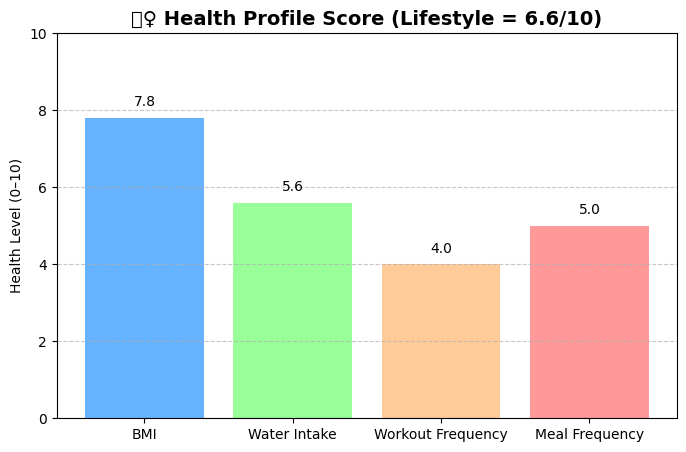

In [8]:
# Show visualization
visualize_health_profile(user, lifestyle_score)


## Save the model

In [9]:
# Save model for deployment
joblib.dump(health_recommendation_system, 'health_lifestyle_recommender.pkl')
print("\n✅ Model saved as health_lifestyle_recommender.pkl")



✅ Model saved as health_lifestyle_recommender.pkl
